#### Task 3: Linear Regression

#### 📘 Linear Regression on Housing Price Prediction Dataset

1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

2. Load Dataset

In [3]:
df = pd.read_csv("Housing.csv")
print("First 5 rows of the dataset:")
display(df.head())

First 5 rows of the dataset:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


3. Exploratory Data Analysis (EDA)

In [11]:
print("=== Dataset Info:===")
df.info()

print("\n=== Summary Statistics:===")
display(df.describe())

print("\n=== Missing Values:===")
display(df.isnull().sum())

=== Dataset Info:===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

=== Summary Statistics:===


,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000



=== Missing Values:===


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

4. Data Preprocessing

In [12]:
# Convert 'yes'/'no' to 1/0 for categorical columns
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    df[col] = df[col].map({'yes': 1, 'no': 0})

In [13]:
# One-hot encode 'furnishingstatus'
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

In [14]:
# Check cleaned dataset
print("\nCleaned Dataset Preview:")
display(df.head())


Cleaned Dataset Preview:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,True,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,False,False


5. Feature Selection

In [15]:
X = df.drop('price', axis=1)
y = df['price']

6. Split the Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

7. Train Linear Regression Model

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

8. Model Evaluation

In [21]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [22]:
print("\n📊 Model Performance Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


📊 Model Performance Metrics:
MAE  : 970043.40
MSE  : 1754318687330.66
RMSE : 1324506.96
R² Score: 0.6529


9. Coefficients Interpretation

In [23]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\n📈 Coefficients:")
display(coefficients)


📈 Coefficients:


,Feature,Coefficient
0,area,2.359688e+02
1,bedrooms,7.677870e+04
2,bathrooms,1.094445e+06
3,stories,4.074766e+05
4,mainroad,3.679199e+05
5,guestroom,2.316100e+05
6,basement,3.902512e+05
7,hotwaterheating,6.846499e+05
8,airconditioning,7.914267e+05
9,parking,2.248419e+05


10. Simple Linear Regression Visualization (e.g., area vs price)

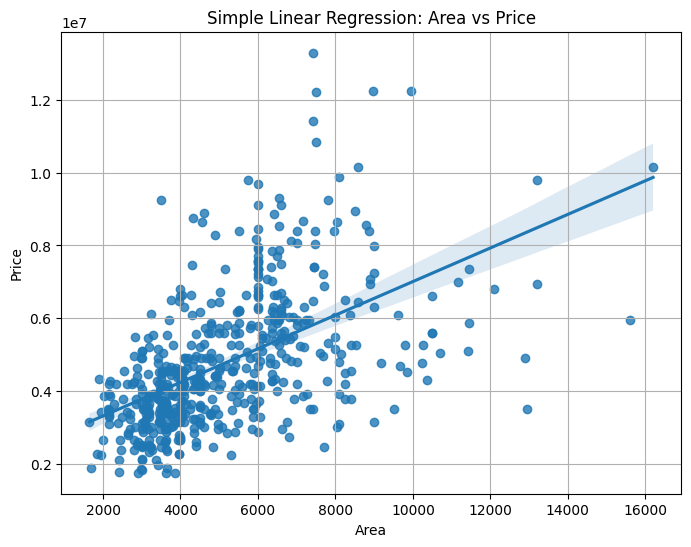

In [24]:
plt.figure(figsize=(8,6))
sns.regplot(x=df['area'], y=df['price'])
plt.title('Simple Linear Regression: Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.grid(True)
plt.show()